# Task 1
Il primo task consiste nel classificare i casi normali e anormali.

Importazione di train_data_aggregated.pkl

In [1]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "train_data_aggregated.pkl")

df_train_aggregated = pd.read_pickle(file_path)

print(df_train_aggregated.head())

   Spacecraft Condition  SV1  SV2  SV3  SV4 BP1 BP2 BP3 BP4  ...  \
0           1    Normal  100  100  100  100  No  No  No  No  ...   
1           1    Normal  100  100  100  100  No  No  No  No  ...   
2           1    Normal  100  100  100  100  No  No  No  No  ...   
3           1    Normal  100  100  100  100  No  No  No  No  ...   
4           1    Normal  100  100  100  100  No  No  No  No  ...   

  P7_time_variance P7_time_line_integral P7_time_min P7_time_max  \
0         0.329054           2366.012724   -0.003006    5.017115   
1         0.335404           2366.376508   -0.003786    4.999330   
2         0.353392           2368.725329   -0.007141    5.000936   
3         0.321221           2365.701657   -0.002395    5.008294   
4         0.324006           2366.740718   -0.002607    4.998044   

   P7_freq_peak_value  P7_freq_peak_freq  P7_freq_sum_power_spectrum  \
0        47260.680479          64.945878               237314.084554   
1        47662.864823          64.9458

In [2]:
print("Colonne del Dataframe:")
print(df_train_aggregated.columns)

Colonne del Dataframe:
Index(['Spacecraft', 'Condition', 'SV1', 'SV2', 'SV3', 'SV4', 'BP1', 'BP2',
       'BP3', 'BP4',
       ...
       'P7_time_variance', 'P7_time_line_integral', 'P7_time_min',
       'P7_time_max', 'P7_freq_peak_value', 'P7_freq_peak_freq',
       'P7_freq_sum_power_spectrum', 'P7_freq_std_power_spectrum',
       'P7_freq_rms_freq', 'Case'],
      dtype='object', length=106)


Rimuoviamo le colonne che non servono

In [3]:
cols_to_drop = ["Spacecraft", "SV1", "SV2", "SV3", "SV4", 
                "BP1", "BP2", "BP3", "BP4", "BP5", "BP6", "BP7", "BV1", "Case"]

df_train_aggregated = df_train_aggregated.drop(columns=cols_to_drop)
print("Colonne dopo la rimozione:")
print(df_train_aggregated.columns)

Colonne dopo la rimozione:
Index(['Condition', 'P1_time_mean', 'P1_time_median', 'P1_time_p25',
       'P1_time_p75', 'P1_time_variance', 'P1_time_line_integral',
       'P1_time_min', 'P1_time_max', 'P1_freq_peak_value', 'P1_freq_peak_freq',
       'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum',
       'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_median', 'P2_time_p25',
       'P2_time_p75', 'P2_time_variance', 'P2_time_line_integral',
       'P2_time_min', 'P2_time_max', 'P2_freq_peak_value', 'P2_freq_peak_freq',
       'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum',
       'P2_freq_rms_freq', 'P3_time_mean', 'P3_time_median', 'P3_time_p25',
       'P3_time_p75', 'P3_time_variance', 'P3_time_line_integral',
       'P3_time_min', 'P3_time_max', 'P3_freq_peak_value', 'P3_freq_peak_freq',
       'P3_freq_sum_power_spectrum', 'P3_freq_std_power_spectrum',
       'P3_freq_rms_freq', 'P4_time_mean', 'P4_time_median', 'P4_time_p25',
       'P4_time_p75', 'P4_time_var

Creaiamo la colonna BinaryCondition: 0 per "Normal", 1 per "Fault" o "Anomaly"

In [4]:
df_train_aggregated["BinaryCondition"] = df_train_aggregated["Condition"].apply(
    lambda x: 0 if x == "Normal" else 1
)

# Elimina la colonna "Condition"
df_train_aggregated = df_train_aggregated.drop(columns=["Condition"])

In [5]:
# Stampa il DataFrame aggiornato
print(df_train_aggregated.columns)

Index(['P1_time_mean', 'P1_time_median', 'P1_time_p25', 'P1_time_p75',
       'P1_time_variance', 'P1_time_line_integral', 'P1_time_min',
       'P1_time_max', 'P1_freq_peak_value', 'P1_freq_peak_freq',
       'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum',
       'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_median', 'P2_time_p25',
       'P2_time_p75', 'P2_time_variance', 'P2_time_line_integral',
       'P2_time_min', 'P2_time_max', 'P2_freq_peak_value', 'P2_freq_peak_freq',
       'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum',
       'P2_freq_rms_freq', 'P3_time_mean', 'P3_time_median', 'P3_time_p25',
       'P3_time_p75', 'P3_time_variance', 'P3_time_line_integral',
       'P3_time_min', 'P3_time_max', 'P3_freq_peak_value', 'P3_freq_peak_freq',
       'P3_freq_sum_power_spectrum', 'P3_freq_std_power_spectrum',
       'P3_freq_rms_freq', 'P4_time_mean', 'P4_time_median', 'P4_time_p25',
       'P4_time_p75', 'P4_time_variance', 'P4_time_line_integral',
       

In [ ]:
#TODO: Creare metriche per valutare le features scelte (come richiesto da COLDS)

Siamo pronti per applicare l'algoritmo di classificazione (Random Forest)

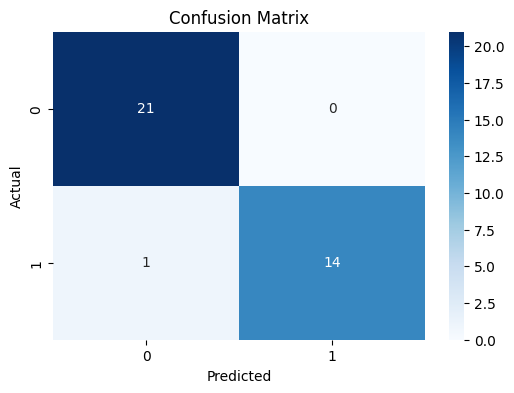

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.93      0.97        15

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722222222222222


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assumendo che df_train_aggregated sia già disponibile nel workspace

# 1. Separazione delle feature e del target
X = df_train_aggregated.drop(columns=["BinaryCondition"])
y = df_train_aggregated["BinaryCondition"]

# 2. Divisione in training e test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Addestramento del modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Previsione sul test set
y_pred = rf_model.predict(X_test)

# 5. Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione con una heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 6. Calcolo e stampa delle metriche principali
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))